Epoch 1/20
40/40 [==============================] - 46s 1s/step - loss: 0.7863 - Accuracy: 0.7465 - val_loss: 2.2866 - val_Accuracy: 0.1775
Epoch 2/20
40/40 [==============================] - 43s 1s/step - loss: 0.2468 - Accuracy: 0.9258 - val_loss: 2.2958 - val_Accuracy: 0.1482
Epoch 3/20
40/40 [==============================] - 50s 1s/step - loss: 0.1910 - Accuracy: 0.9410 - val_loss: 2.2359 - val_Accuracy: 0.2661
Epoch 4/20
40/40 [==============================] - 40s 1s/step - loss: 0.1546 - Accuracy: 0.9559 - val_loss: 2.1600 - val_Accuracy: 0.3253
Epoch 5/20
40/40 [==============================] - 42s 1s/step - loss: 0.1286 - Accuracy: 0.9594 - val_loss: 1.9526 - val_Accuracy: 0.5638
Epoch 6/20
40/40 [==============================] - 44s 1s/step - loss: 0.1261 - Accuracy: 0.9648 - val_loss: 1.7321 - val_Accuracy: 0.5678
Epoch 7/20
40/40 [==============================] - 44s 1s/step - loss: 0.1207 - Accuracy: 0.9566 - val_loss: 1.4020 - val_Accuracy: 0.7812
Epoch 8/20
40/40 [==

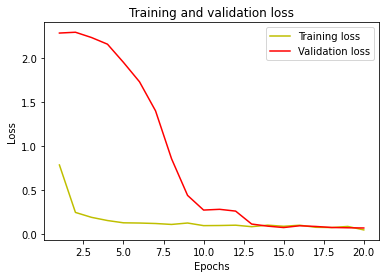

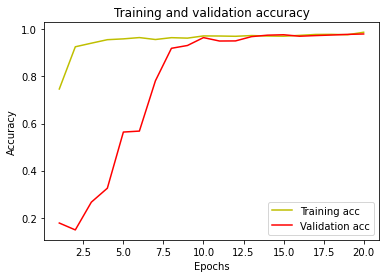

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,Dense,BatchNormalization,Layer,Flatten
from tensorflow.keras.utils import to_categorical

(x_train,y_train),(x_test,y_test)=mnist.load_data()



y_train=to_categorical(y_train)
y_test=to_categorical(y_test)



x_train=np.reshape(x_train,(x_train.shape[0],28,28,1))
x_test=np.reshape(x_test,(x_test.shape[0],28,28,1))
x_train=x_train/255.0
x_test=x_test/255.0

class CNNmodel(Layer):
    def __init__(self,channels,kernel_size=(3,3)):
        super (CNNmodel,self).__init__()
        self.conv=Conv2D(channels,kernel_size,padding='same')
        self.bn=BatchNormalization()
    def call(self,input_tensor=(28,28,1),training=False):
        x=self.conv(input_tensor)
        x=self.bn(x,training=training)
        x=tensorflow.nn.relu(x)
        return x



class ResBlock(Layer):
    def __init__(self,channels,kernel_size=(3,3)):
        super (ResBlock,self).__init__()
        self.cnn1=CNNmodel(channels[0])
        self.cnn2=CNNmodel(channels[1])
        self.cnn3=CNNmodel(channels[2])
        self.identity_mapping=Conv2D(channels[1],kernel_size,padding='same')
    def call(self,input_tensor,training=False):
        x=self.cnn1(input_tensor)
        x=self.cnn2(x,training=training)
        x=tensorflow.nn.relu(x+self.identity_mapping(input_tensor))
        x=self.cnn3(x)
        return x

model=Sequential([ResBlock([64,16,8]),
                 ResBlock([32,16,8]),
                 Flatten(),
                 Dense(10,activation='softmax')])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Accuracy'])


history=model.fit(x_train,y_train,batch_size=64,epochs=20,validation_split=0.2,steps_per_epoch=40)




loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
loss,testing_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 30s 97ms/step - loss: 0.0556 - Accuracy: 0.9822


In [10]:
print("testing_accuracy: %.2f%%" % (testing_accuracy*100))

testing_accuracy: 98.22%


In [20]:
model.save('/content/drive/MyDrive/Colab Notebooks/')

In [22]:
model2=tensorflow.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/')

In [23]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 21s 65ms/step - loss: 0.0556 - Accuracy: 0.9822


[0.055559515953063965, 0.982200026512146]